# Temperature

<p style="font-family: arial, Times New Roman; font-size:12pt; color:black;text-align:justify">
    Temperature database stations 11 (Tmax), 14 (Tmax, Tmin)
 </p>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
# system
import os
import os.path as op
import sys

# arrays
import numpy as np
import pandas as pd
import datetime

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## 2.1 Load data

In [3]:
p_db = op.join(os.getcwd(),'..','..','data','Temperature')

# database temperature stations 11 - 14 (txt file)
p_dat11 = op.join(p_db, 'Tmax_Est_11.txt')
p_dat14 = op.join(p_db, 'Tmax_Tmin_Est_14.txt')

# database exploration
data11 = pd.read_csv(
    p_dat11,   
    header=0, sep='\t',
    na_values = -9999,
    names = ['year', 'month', 'day', 'Tmax']
)

data14 = pd.read_csv(
    p_dat14,   
    header=0, sep='\t',
    na_values = -9999,
    names = ['year', 'month', 'day', 'Tmax', 'Tmin']
)


In [4]:
# format to Celsius degrees (ªC)
data11.Tmax = data11.Tmax/10

data14.Tmax = data14.Tmax/10
data14.Tmin = data14.Tmin/10

In [5]:
# create date column with datetime
data11.index = pd.to_datetime(data11[['year', 'month', 'day']], errors='coerce')
data14.index = pd.to_datetime(data14[['year', 'month', 'day']], errors='coerce')

In [6]:
def func(dataframe):
    return(len(np.unique(dataframe.month.values)))
true_month = data11.dropna().drop(columns=['day','Tmax']).groupby(by=['year']).apply(func) >= 8
dropm = np.array(true_month.index[true_month==False])
data11 = data11[data11.year.values != dropm]

## 2.2 Plot daily series

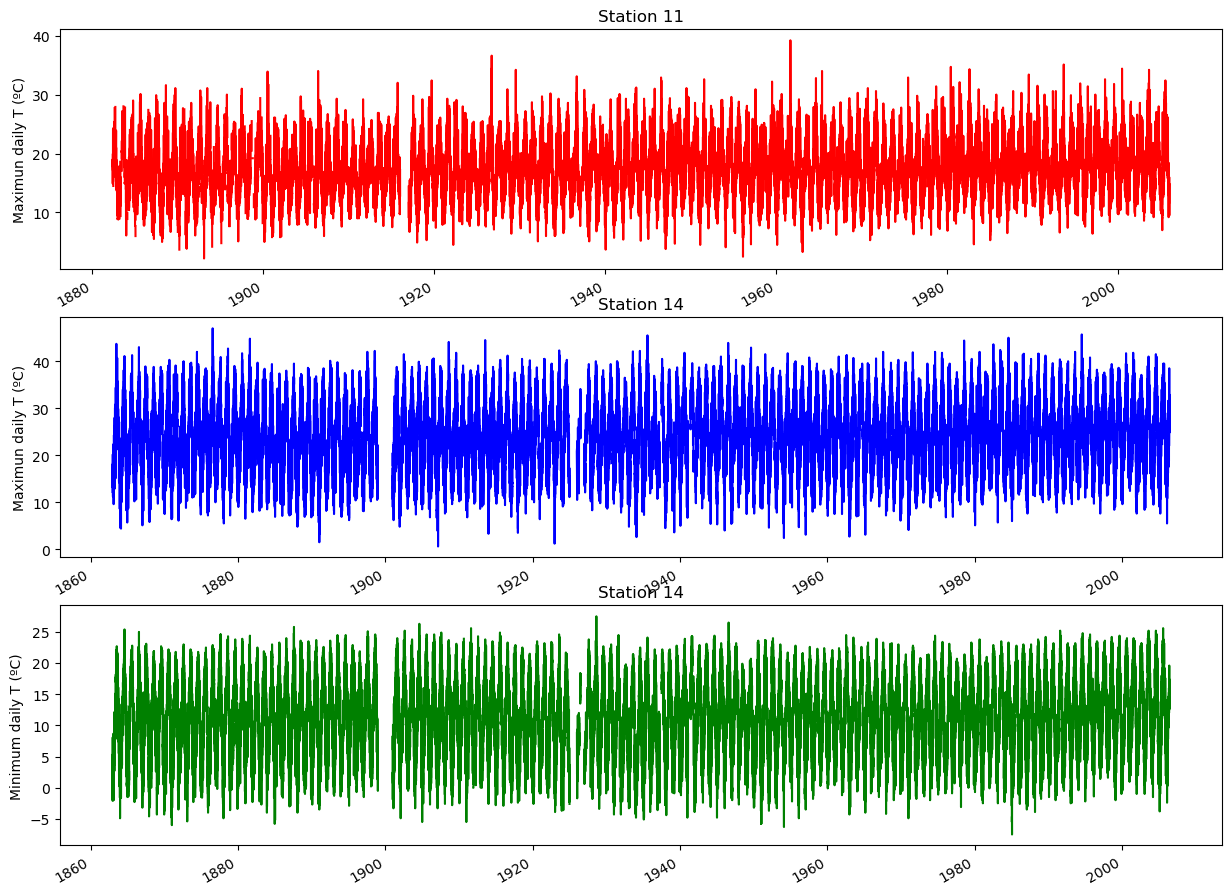

In [7]:
# Use pandas library for plotting daily series
fig, axs = plt.subplots(3,1, figsize=(15,12))

data11.Tmax.plot(
    ax=axs[0],
    color='red',
    title='Station 11',
    #ylabel='Maximun daily T (ºC)'
)
axs[0].set_ylabel('Maximun daily T (ºC)')


data14.Tmax.plot(
    ax=axs[1],
    color='blue',
    title='Station 14',
    #ylabel='Maximun daily T (ºC)'
)
axs[1].set_ylabel('Maximun daily T (ºC)')

data14.Tmin.plot(
    ax=axs[2],
    color='green',
    title='Station 14',
    #ylabel='Minimun daily T (ºC)'
)
axs[2].set_ylabel('Minimum daily T (ºC)')

plt.show()

## 2.3 Monthly maxima

In [8]:
df_mm_max11 = data11.groupby(by=['year','month'])['Tmax'].max().dropna().reset_index()
df_mm_max11 = pd.merge(df_mm_max11, data11, how='inner', on=['year', 'month', 'Tmax']) #To add extra variables: day
df_mm_max11['date'] = pd.to_datetime(df_mm_max11[['year', 'month', 'day']], errors='coerce')
df_mm_max11

,year,month,Tmax,day,date
0,1882,5,24.1,31,1882-05-31
1,1882,6,24.4,29,1882-06-29
2,1882,7,23.5,14,1882-07-14
3,1882,8,27.7,7,1882-08-07
4,1882,9,27.9,8,1882-09-08
...,...,...,...,...,...
1585,2005,8,28.6,7,2005-08-07
1586,2005,9,26.5,4,2005-09-04
1587,2005,10,26.2,9,2005-10-09
1588,2005,11,20.0,2,2005-11-02


In [9]:
df_mm_max14= data14.groupby(by=['year','month'])['Tmax'].max().dropna().reset_index()
df_mm_max14 = pd.merge(df_mm_max14, data14, how='inner', on=['year', 'month', 'Tmax'])
df_mm_max14['date'] = pd.to_datetime(df_mm_max14[['year', 'month', 'day']], errors='coerce')
df_mm_max14.head()

,year,month,Tmax,day,Tmin,date
0,1863,1,22.3,24,1.3,1863-01-24
1,1863,2,21.7,1,2.4,1863-02-01
2,1863,3,26.1,30,7.0,1863-03-30
3,1863,4,30.1,29,7.6,1863-04-29
4,1863,5,30.8,17,12.9,1863-05-17


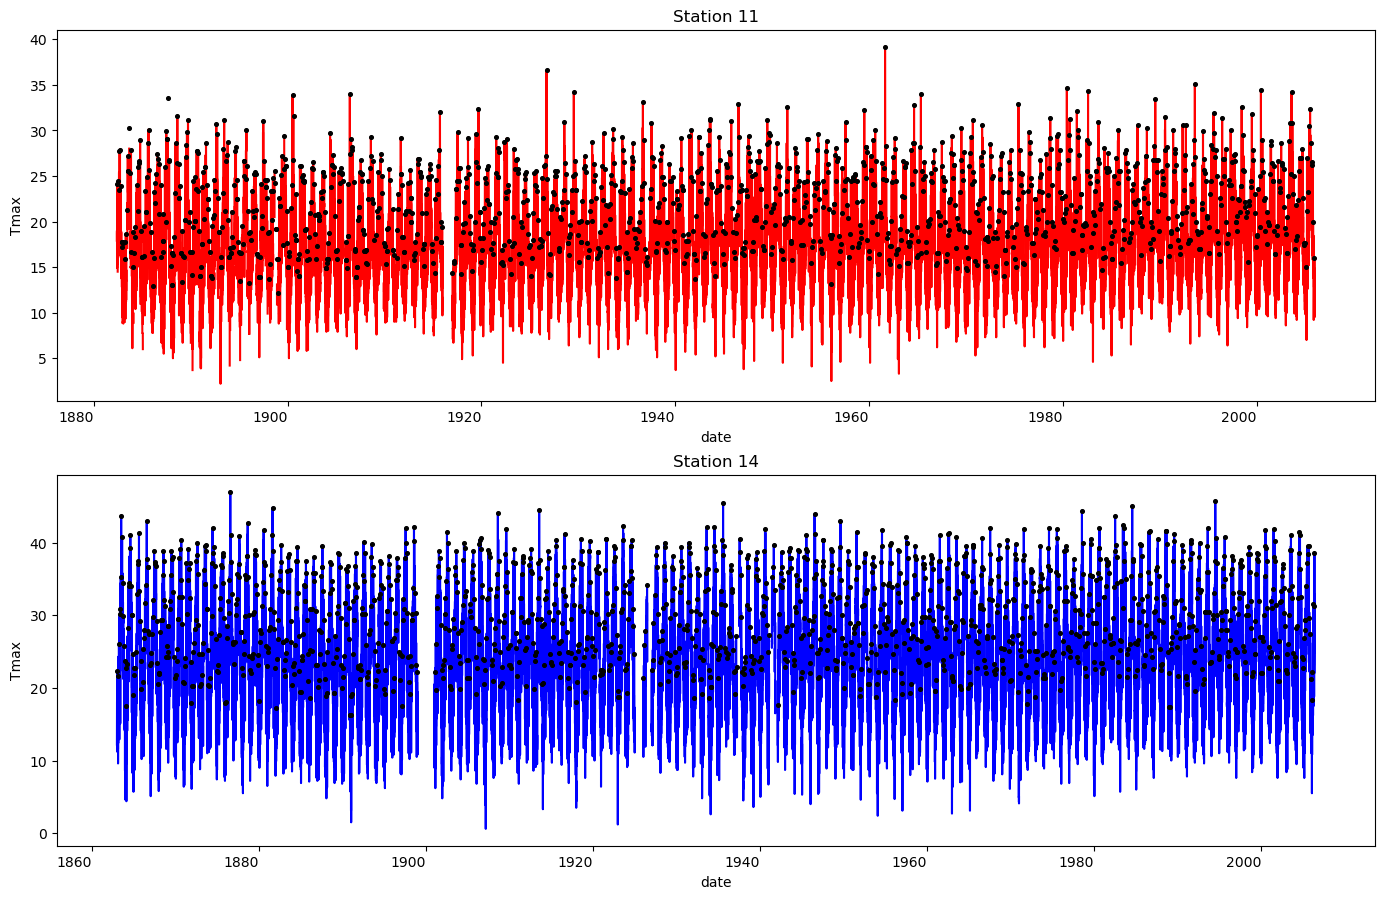

In [10]:
fig, axs = plt.subplots(2, figsize=(17,12))
data11.Tmax.plot(
    ax=axs[0],zorder=1,
    color='red',
    title='Station 11',
    ylabel='Maximun daily T (ºC)')

df_mm_max11.plot.scatter(
    x='date', y='Tmax',
    ax=axs[0], color='k', s=7,
    zorder=2
)

data14.Tmax.plot(
    ax=axs[1],zorder=1,
    color='blue',
    title='Station 14',
    ylabel='Maximun daily T (ºC)')

df_mm_max14.plot.scatter(
    x='date', y='Tmax',
    ax=axs[1], color='k', s=7,
    zorder=2
)

plt.show()

## Perpetual Year

In [11]:
# Plot the maximun montlhy temperatures from 1 Jan - 31 Dec

In [12]:
# Create year colum
df_mm_max11.year = np.ones(len(df_mm_max11))*1990
df_mm_max11.index = pd.to_datetime(df_mm_max11[['year', 'month', 'day']], errors='coerce')
df_mm_max11.index.name = 'time'
ds_mm_max11 = df_mm_max11.to_xarray()

df_mm_max14.year = np.ones(len(df_mm_max14))*1990
df_mm_max14.index = pd.to_datetime(df_mm_max14[['year', 'month', 'day']], errors='coerce')
df_mm_max14.index.name = 'time'
ds_mm_max14 = df_mm_max14.to_xarray()

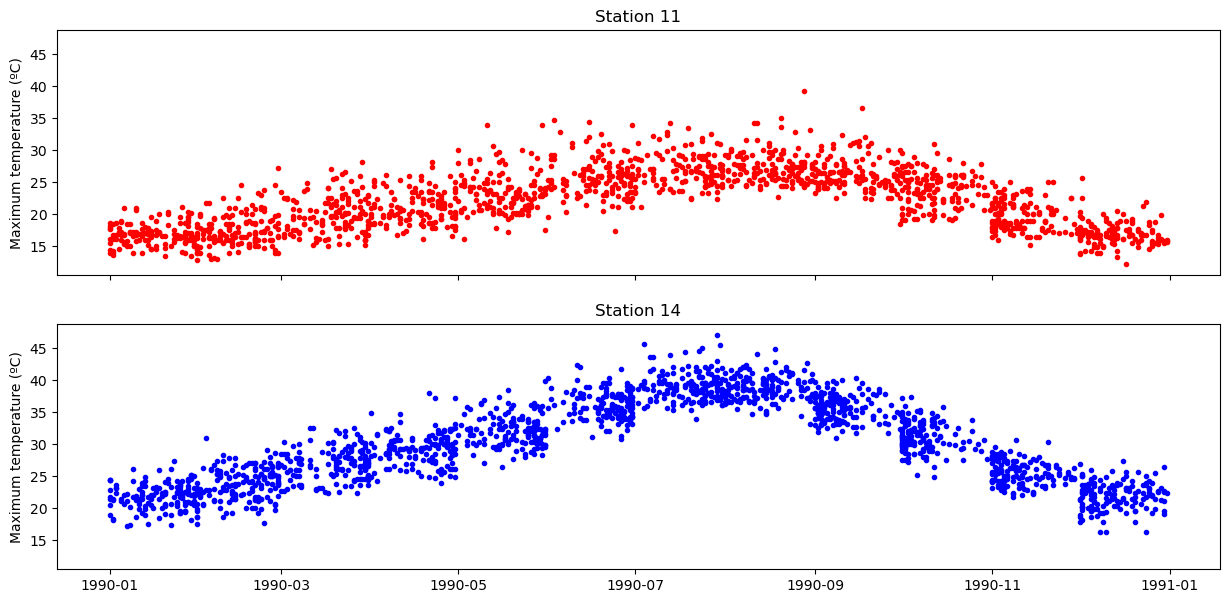

In [13]:
fig, axs = plt.subplots(2, figsize=(15,7), sharex=True, sharey=True)
axs[0].plot(ds_mm_max11.time, ds_mm_max11.Tmax, '.', color='r')
axs[0].set_ylabel('Maximum temperature (ºC)')
axs[0].set_title('Station 11')

axs[1].plot(ds_mm_max14.time, ds_mm_max14.Tmax, '.', color='b')
axs[1].set_ylabel('Maximum temperature (ºC)')
axs[1].set_title('Station 14')
plt.show()

## 2.4 GEV distribution fit to monthly maxima

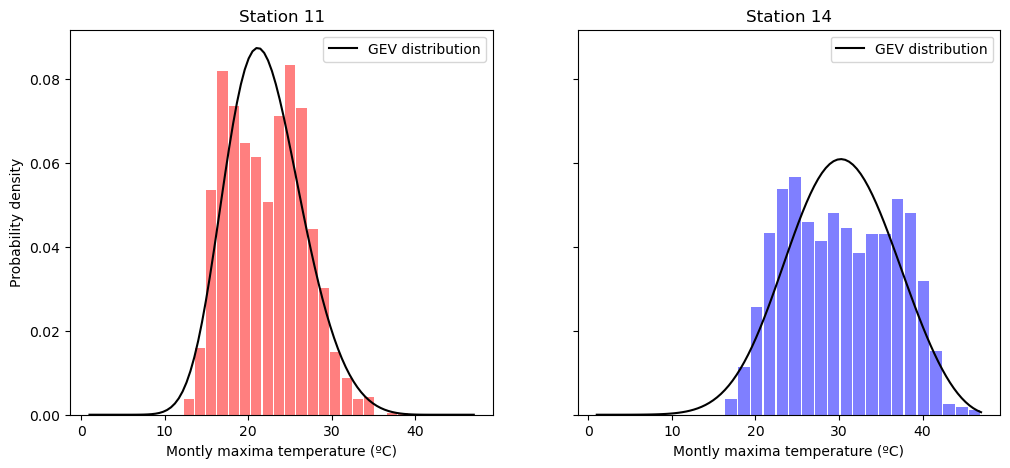

In [14]:
# Fitting GEV distribution and plotting with matplotlib
from scipy.stats import genextreme as gev

nbins = 20
t = np.linspace(1,np.max([df_mm_max11.Tmax.max(),df_mm_max14.Tmax.max()]),100)

fit = gev.fit(df_mm_max11.Tmax)
pdf = gev.pdf(t, *fit)

fit1 = gev.fit(df_mm_max14.Tmax)
pdf1 = gev.pdf(t, *fit1)

fig, axs = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
axs[0].plot(t,pdf, color='k', label='GEV distribution')
axs[0].hist(df_mm_max11.Tmax,
         bins=nbins,color='red',
         alpha=0.5, density=1, 
         rwidth=0.9)

axs[1].plot(t,pdf1, color='k', label='GEV distribution')
axs[1].hist(df_mm_max14.Tmax,
         bins=nbins,color='blue',
         alpha=0.5, density=1, 
         rwidth=0.9)

axs[0].set_xlabel('Montly maxima temperature (ºC)')
axs[1].set_xlabel('Montly maxima temperature (ºC)')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Station 11')
axs[1].set_title('Station 14')
axs[0].legend()
axs[1].legend()
plt.show()

## 2.5 Probability density functions of montlhy maximas

In [15]:
station = df_mm_max11

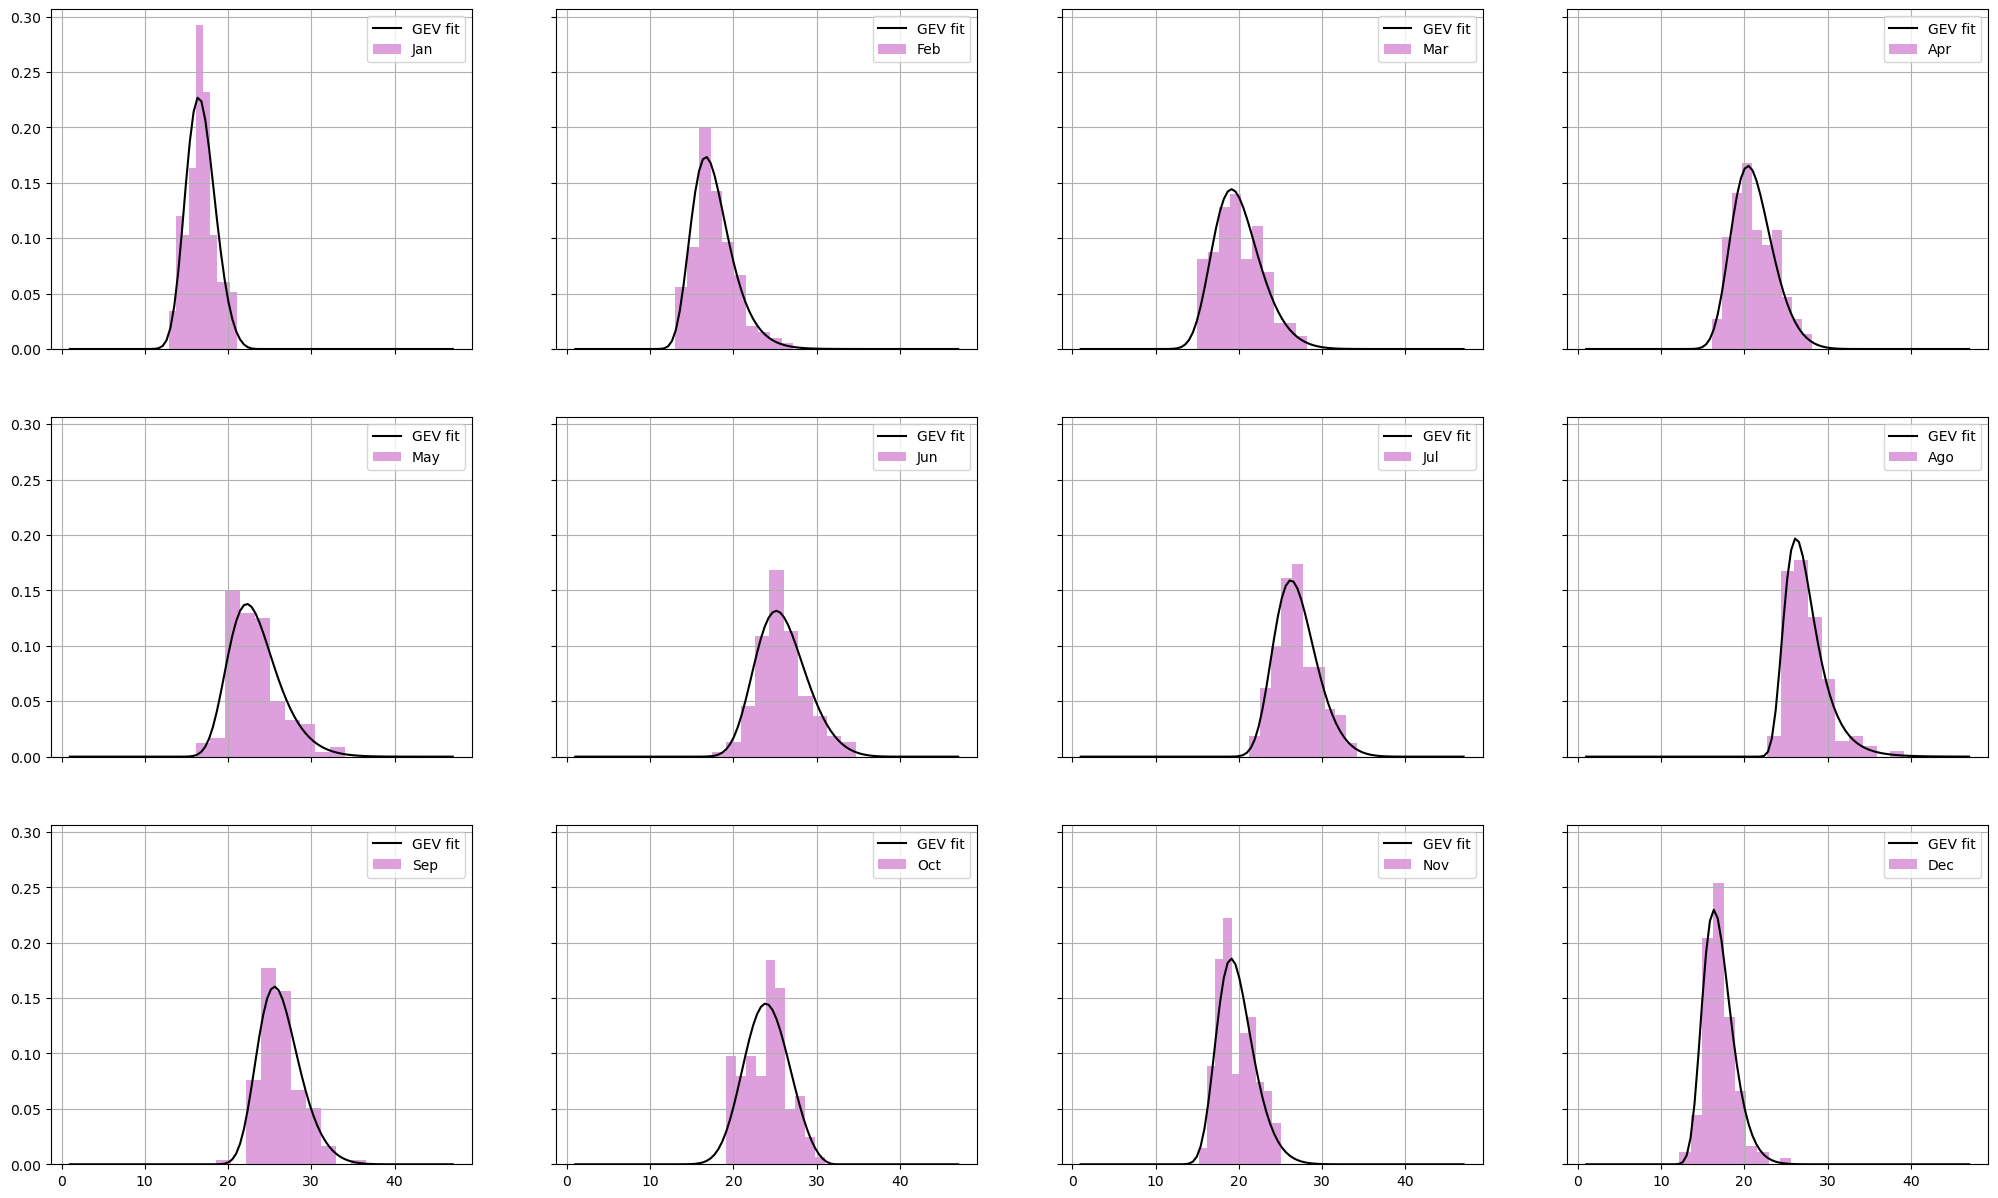

In [16]:
# scatterplot every variable (using matplotlib.gridspec)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(3, 4, figsize=(25,15), sharex=True, sharey=True)

m = 0
for c1, v1 in enumerate(np.arange(0,3,1)):
    for c2, v2 in enumerate(np.arange(0,4,1)):
        m+=1
        datai = station.loc[station.month==m].Tmax
            
        fit = gev.fit(datai)
        pdf = gev.pdf(t, *fit)
        
        axs[c1,c2].plot(t, pdf, label='GEV fit', color='k')
        datai.hist(ax=axs[c1, c2], density=1, label=month[m-1], color='plum')
        axs[c1, c2].legend()
plt.show()

## 2.5 Anual maxima

In [17]:
df_am_max11 = data11.groupby(by=['year'])['Tmax'].max().dropna().reset_index()
df_am_max11 = pd.merge(df_am_max11, data11, how='inner', on=['year', 'Tmax'])
df_am_max11['date'] = pd.to_datetime(df_am_max11[['year', 'month', 'day']], errors='coerce')
df_am_max11.head()

,year,Tmax,month,day,date
0,1882,27.9,9,8,1882-09-08
1,1883,30.3,8,26,1883-08-26
2,1884,29.0,10,5,1884-10-05
3,1885,30.1,8,18,1885-08-18
4,1886,27.4,7,17,1886-07-17


In [18]:
df_am_max14 = data14.groupby(by=['year'])['Tmax'].max().dropna().reset_index()
df_am_max14 = pd.merge(df_am_max14, data14, how='inner', on=['year', 'Tmax'])
df_am_max14['date'] = pd.to_datetime(df_am_max14[['year', 'month', 'day']], errors='coerce')
df_am_max14.head()

,year,Tmax,month,day,Tmin,date
0,1863,43.7,7,6,19.6,1863-07-06
1,1864,41.1,8,10,20.3,1864-08-10
2,1865,41.3,8,23,20.2,1865-08-23
3,1866,43.0,7,29,19.7,1866-07-29
4,1867,38.9,6,14,15.8,1867-06-14


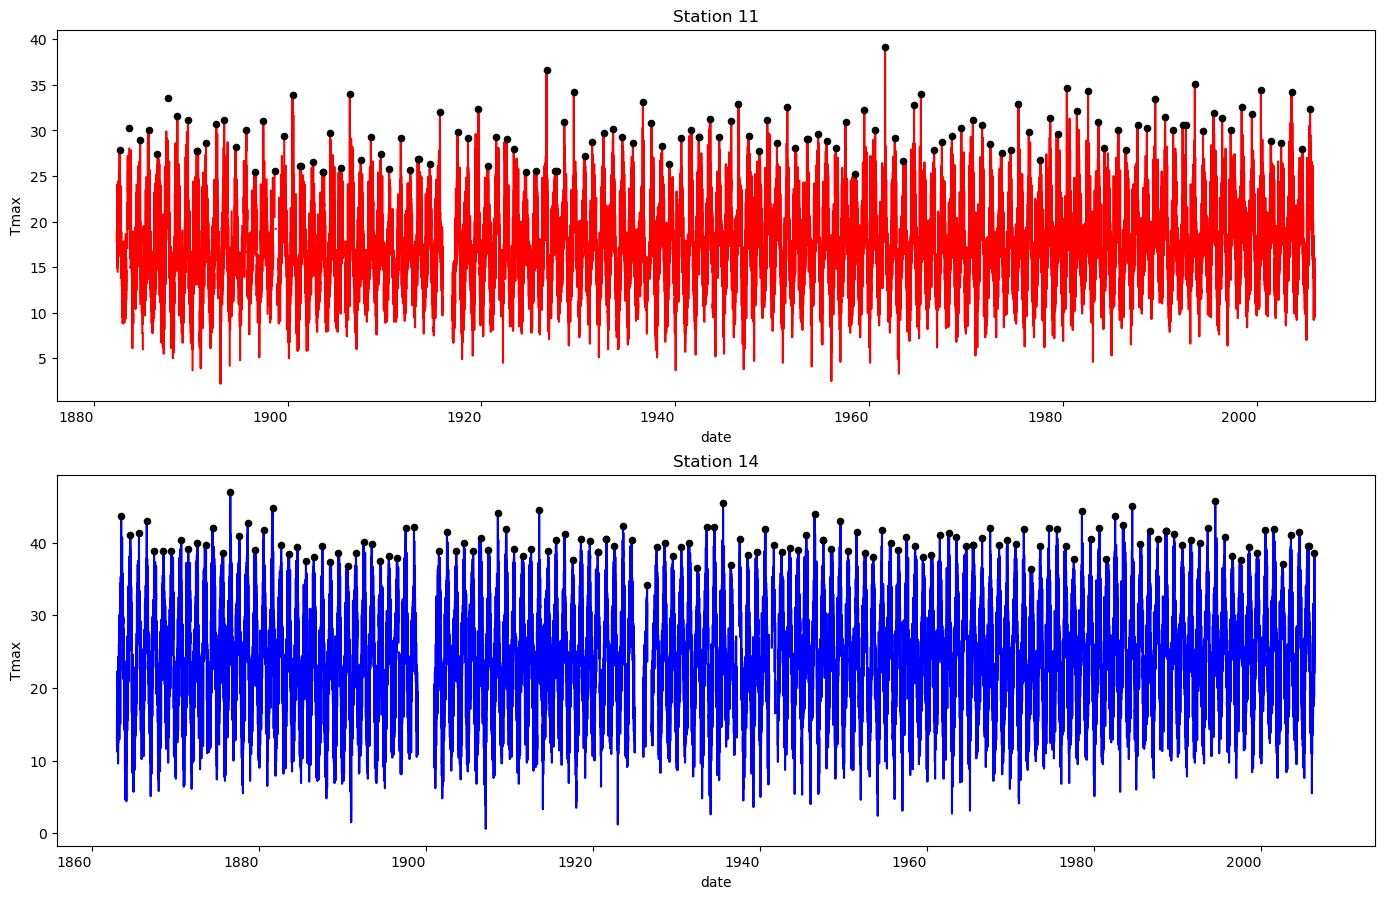

In [19]:
fig, axs = plt.subplots(2, figsize=(17,12))
data11.Tmax.plot(
    ax=axs[0],zorder=1,
    color='red',
    title='Station 11',
    ylabel='Maximun daily T (ºC)')

df_am_max11.plot.scatter(
    x='date', y='Tmax',
    ax=axs[0], color='k',
    zorder=2
)

data14.Tmax.plot(
    ax=axs[1],zorder=1,
    color='blue',
    title='Station 14',
    ylabel='Maximun daily T (ºC)')

df_am_max14.plot.scatter(
    x='date', y='Tmax',
    ax=axs[1], color='k',
    zorder=2
)

plt.show()

In [20]:
# Plot the maximun annual temperatures from 1 Jan - 31 Dec

In [21]:
# Create year colum
df_am_max11.year = np.ones(len(df_am_max11))*1990
df_am_max11.index = pd.to_datetime(df_am_max11[['year', 'month', 'day']], errors='coerce')
df_am_max11.index.name = 'time'
df_am_max11 = df_am_max11.to_xarray()

df_am_max14.year = np.ones(len(df_am_max14))*1990
df_am_max14.index = pd.to_datetime(df_am_max14[['year', 'month', 'day']], errors='coerce')
df_am_max14.index.name = 'time'
df_am_max14 = df_am_max14.to_xarray()

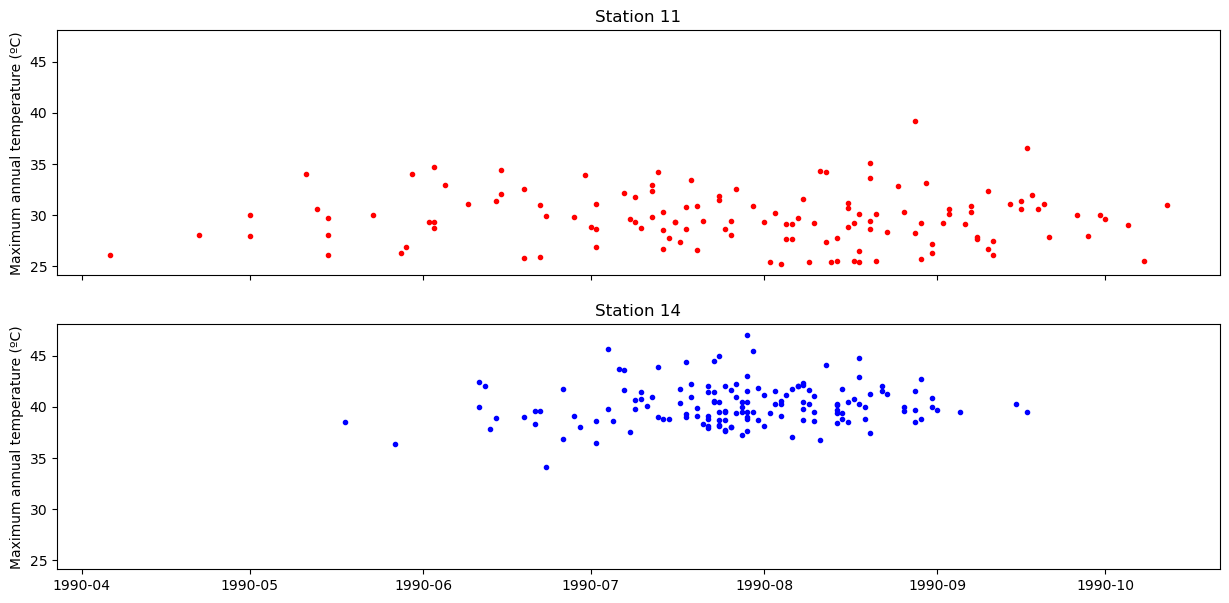

In [22]:
fig, axs = plt.subplots(2, figsize=(15,7), sharex=True, sharey=True)
axs[0].plot(df_am_max11.time, df_am_max11.Tmax, '.', color='r')
axs[0].set_ylabel('Maximum annual temperature (ºC)')
axs[0].set_title('Station 11')

axs[1].plot(df_am_max14.time, df_am_max14.Tmax, '.', color='b')
axs[1].set_ylabel('Maximum annual temperature (ºC)')
axs[1].set_title('Station 14')
plt.show()

## 2.6 GEV distribution fit to annual maxima

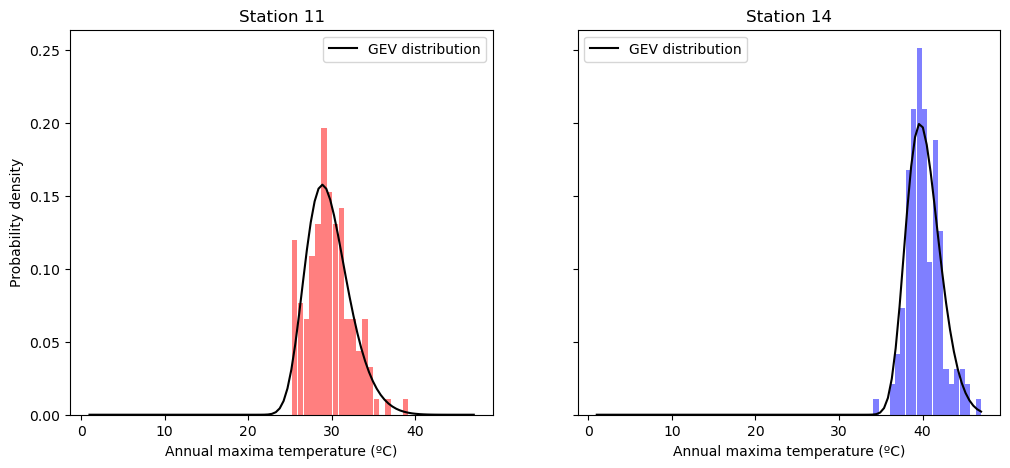

In [23]:
# Fitting GEV distribution and plotting with matplotlib
nbins = 20
t = np.linspace(1,np.max([df_am_max11.Tmax.max(),df_am_max14.Tmax.max()]),100)

fit = gev.fit(df_am_max11.Tmax)
pdf = gev.pdf(t, *fit)

fit1 = gev.fit(df_am_max14.Tmax)
pdf1 = gev.pdf(t, *fit1)

fig, axs = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)
axs[0].plot(t,pdf, color='k', label='GEV distribution')
axs[0].hist(df_am_max11.Tmax,
         bins=nbins,color='red',
         alpha=0.5, density=1, 
         rwidth=0.95)

axs[1].plot(t,pdf1, color='k', label='GEV distribution')
axs[1].hist(df_am_max14.Tmax,
         bins=nbins,color='blue',
         alpha=0.5, density=1, 
         rwidth=0.95)

axs[0].set_xlabel('Annual maxima temperature (ºC)')
axs[1].set_xlabel('Annual maxima temperature (ºC)')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Station 11')
axs[1].set_title('Station 14')
axs[0].legend()
axs[1].legend()
plt.show()